In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Basics

Interactive use of the `scqubits` library from a jupyter notebook starts with importing the `scqubits` library.

In [2]:
import scqubits as qubit
import scqubits.utils.plotting as plot

import numpy as np

## Example: Transmon qubit

To illustrate basic functionality built into scqubits, we consider the implementation of the transmon qubit as an example. Each qubit type is represented by a class that accomplishes storage of relevant data, such as circuit parameters, and provides a collection of methods used for common computations and plotting. (A more systematic discussion of the set of qubits available in scqubits is given in the subsequent section.)

An instance of the transmon qubit is set up by creating an instance of the class `Transmon` and providing the necessary system parameters for initialization: 

In [3]:
transmon = qubit.Transmon(
    EJ=30.02,
    EC=1.2,
    ng=0.3,
    ncut=31
    )

.. warning::
   scqubits does not check convergence with respect to Hilbert space truncation. For example, in the case of the transmon qubit,
   this regards the charge cutoff `ncut`. Responsibility to establish convergence with respect to cutoffs lies with the user.

## Computing and plotting energy spectra

The energy eigenvalues of the transmon Hamiltonian are obtained by calling the `eigenvals()` method. The optional parameter `evals_count` specifies the sought number of eigenenergies:

In [4]:
transmon.eigenvals(evals_count=12)

array([-21.84381856,  -6.17518551,   8.01366695,  20.04897106,
        30.54312385,  38.7071573 ,  54.55482909,  67.49323244,
        90.05182723, 107.1140667 , 135.67852225, 156.68219246])

To plot eigenenergies as a function of one of the qubit parameters (`EJ`, `EC`, or `ng`), the first step is to generate an array of values for the desired parameter. Then, call the method `plot_evals_vs_paramvals`, specifying the parameter to be varied as a string. The following is an example for eigenenergies as a function of offset charge `ng`:

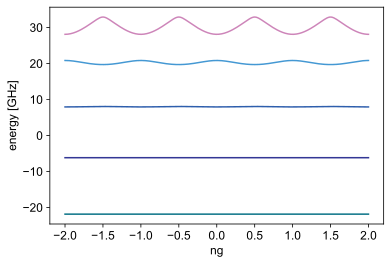

In [5]:
ng_list = np.linspace(-2, 2, 220)
transmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=5, subtract_ground=False);

Note that plotting routines generally return a matplotlib.Figure and a matplotlib.axes object, in case further processing is desired.

The next example fixes the offset charge, but varies the Josephson energy `EJ` in a manner characteristic for a split-junction transmon where `EJ` is flux tunable.

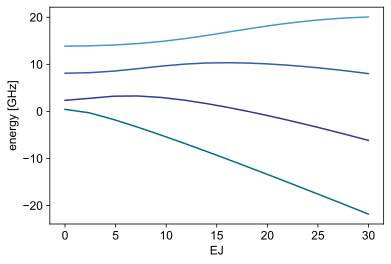

In [5]:
transmon.ng = 0.3
ej_vals = transmon.EJ * np.cos(np.linspace(-np.pi/2, np.pi/2, 40))
transmon.plot_evals_vs_paramvals('EJ', ej_vals, evals_count=4, subtract_ground=False);

The full eigensystem consisting of both eigenvalues and eigenvectors is obtained through the method `eigensys()`. For the transmon qubit, the calculation proceeds in the charge basis, and uses `scipy.linalg.eigh` for matrix diagonalization. Accordingly, the eigenvector corresponding to the lowest eigenvalue is `evecs.T[0]`.

In [7]:
evals, evecs = transmon.eigensys()

## Plotting wavefunctions

For a qubit as simple as the transmon, wavefunctions are one-dimensional and can be plotted easily. The first option, is to employ the discrete charge basis (`n`):

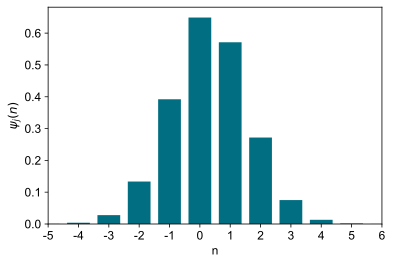

In [6]:
transmon.plot_n_wavefunction(esys=None, which=0, mode='real');

Here, `esys=None` signifies that the eigensystem is not provided as an argument, but should be calculated fresh. 
`which=0` specifies that the ground state wavefunction is to be plotted. 
Finally, `mode='real'` is asking for a plot of the real parts of the wavefunction amplitudes. 

The options for `mode` are:

|  mode keyword    |   extracted function of amplitudes                |
|------------------|---------------------------------------------------|
| `'real'`         | real part of wavefunction amplitudes              |
| `'imag'`         | imaginary part of wavefunction amplitudes         |
| `'abs'`          | absolute value of wavefunction amplitudes         |
| `'abs_sqr'`      | absolute value squared of wavefunction amplitudes |


Instead of the charge-basis representation, the transmon wavefunction can also be plotted in phi representation by switching from `n` to `phi`. Multiple wavefunctions can be plotted simultaneously by feeding a tuple to the argument `which`:


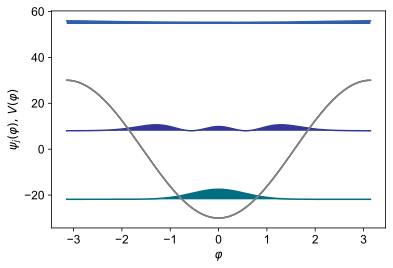

In [7]:
transmon.plot_phi_wavefunction(esys=None, which=[0,2,6], mode='abs_sqr');

Wavefunctions are displayed on top of the cosine potential, and are offset by their corresponding eigenenergies.

## Evaluating and visualizing matrix elements

For a number of purposes, one needs to compute matrix elements of operators such as the charge operator with respect to the eigenstates of the system. For a display of the matrix elements of the operator `n_operator` (the charge number operator), use:

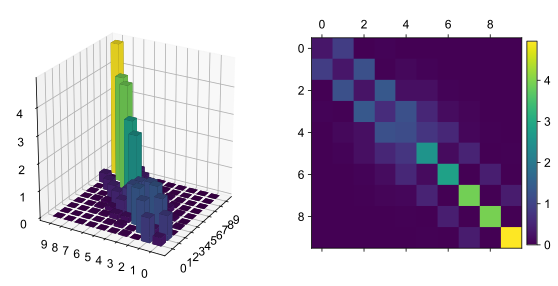

In [4]:
transmon.plot_matrixelements('n_operator', evals_count=10);

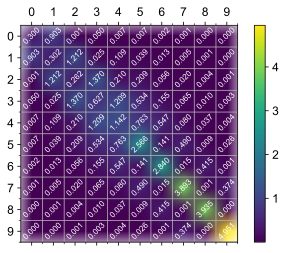

In [9]:
nmat = transmon.matrixelement_table('n_operator', evecs=None, evals_count=10)
plot.print_matrix(np.abs(nmat));

Sometimes it is useful to plot matrix elements as a function of an external parameter. This is accomplished by the method `plot_matelem_vs_paramvals()`, here for the dependence of charge-operator matrix elements on the offset charge `ng`:

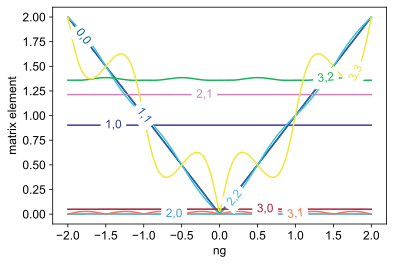

In [5]:
ng_list = np.linspace(-2, 2, 220)
transmon.plot_matelem_vs_paramvals('n_operator', 'ng', ng_list, select_elems=4);